### Kutuphanelerin import edilmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

#### Cifar-10 veri setinin indirilip train/test olarak ayrılması

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

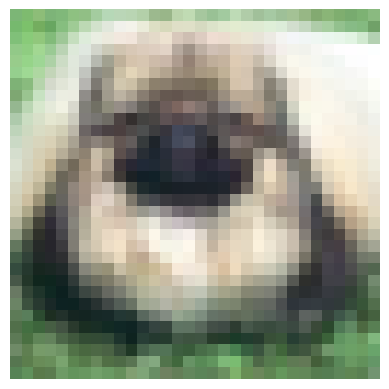

In [10]:
rand_index = np.random.randint(0,len(x_train))
rand_img = x_train[rand_index]
rand_label = y_train[rand_index][0]

plt.imshow(rand_img)
plt.axis('off')
plt.show()

### verisetinden random resim seçme

In [12]:
print("shape : ",rand_img.shape)
print("\nimg array : \n", rand_img)

shape :  (32, 32, 3)

img array : 
 [[[124 182 118]
  [126 187 111]
  [141 189 120]
  ...
  [120 171 111]
  [125 178 115]
  [138 186 128]]

 [[118 185 110]
  [124 193 107]
  [116 173  95]
  ...
  [135 187 134]
  [132 186 128]
  [112 161 104]]

 [[128 192 121]
  [137 203 121]
  [145 199 124]
  ...
  [226 244 227]
  [209 233 208]
  [179 209 178]]

 ...

 [[111 138 103]
  [ 95 127  81]
  [119 155 105]
  ...
  [108 161 102]
  [108 158  98]
  [105 164 107]]

 [[ 86 118  80]
  [ 92 126  77]
  [105 140  88]
  ...
  [106 153  98]
  [ 98 145  91]
  [100 150 103]]

 [[ 86 131  85]
  [ 96 145  91]
  [ 90 122  74]
  ...
  [ 95 134  83]
  [ 90 128  82]
  [114 148 113]]]


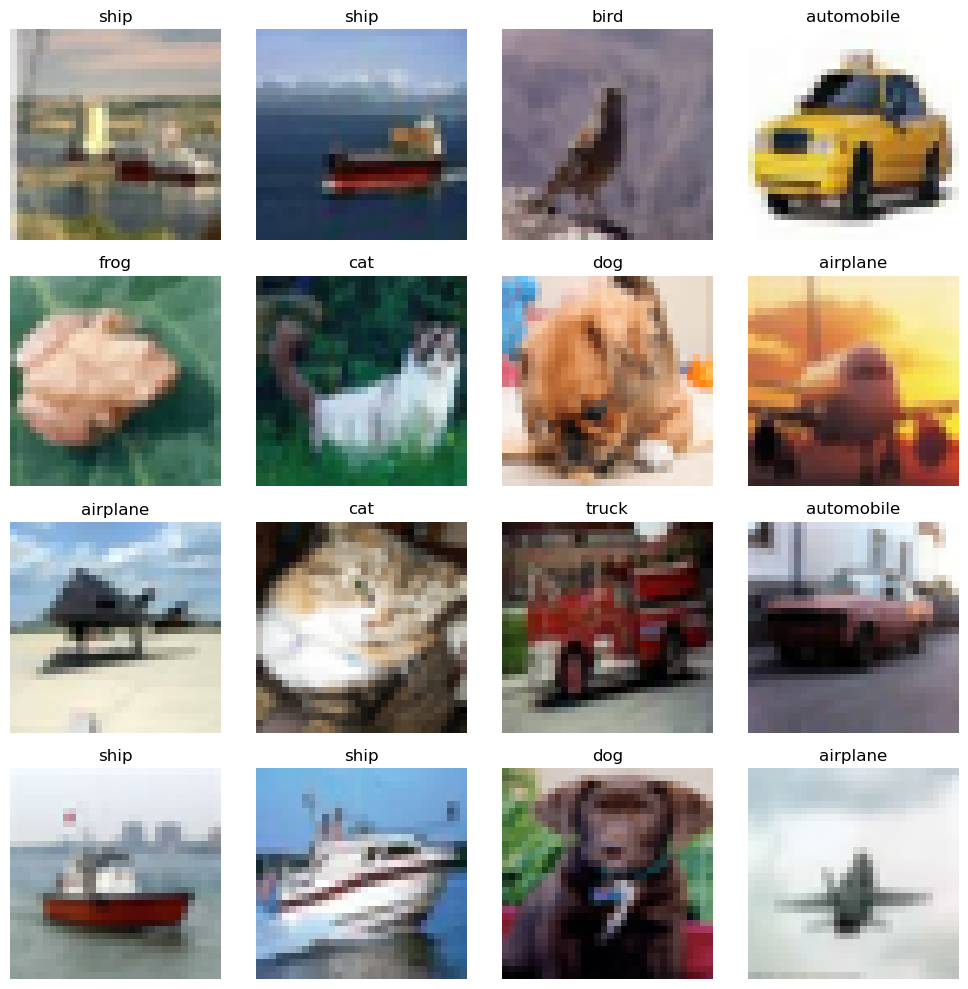

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_samples = 16  ## 16 resim seçilecek
random_indices = np.random.choice(x_train.shape[0],num_samples, replace=False) ## random resim seçme
sample_img = x_train[random_indices]    # verisetinden random seçme
sample_labels = y_train[random_indices]  # train setinin etiketleri getiriliyor

plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_img[i])
    plt.title(class_names[int(sample_labels[i][0])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [15]:
#Normalizasyon
x_train = x_train/255
x_test = x_test/255

Aynı resimlerin normalizasyondan sonraki görüntüleri. RGB değerleri 0-1 arasına sıkıştırdık. Herhangi bir değişiklik olmadı

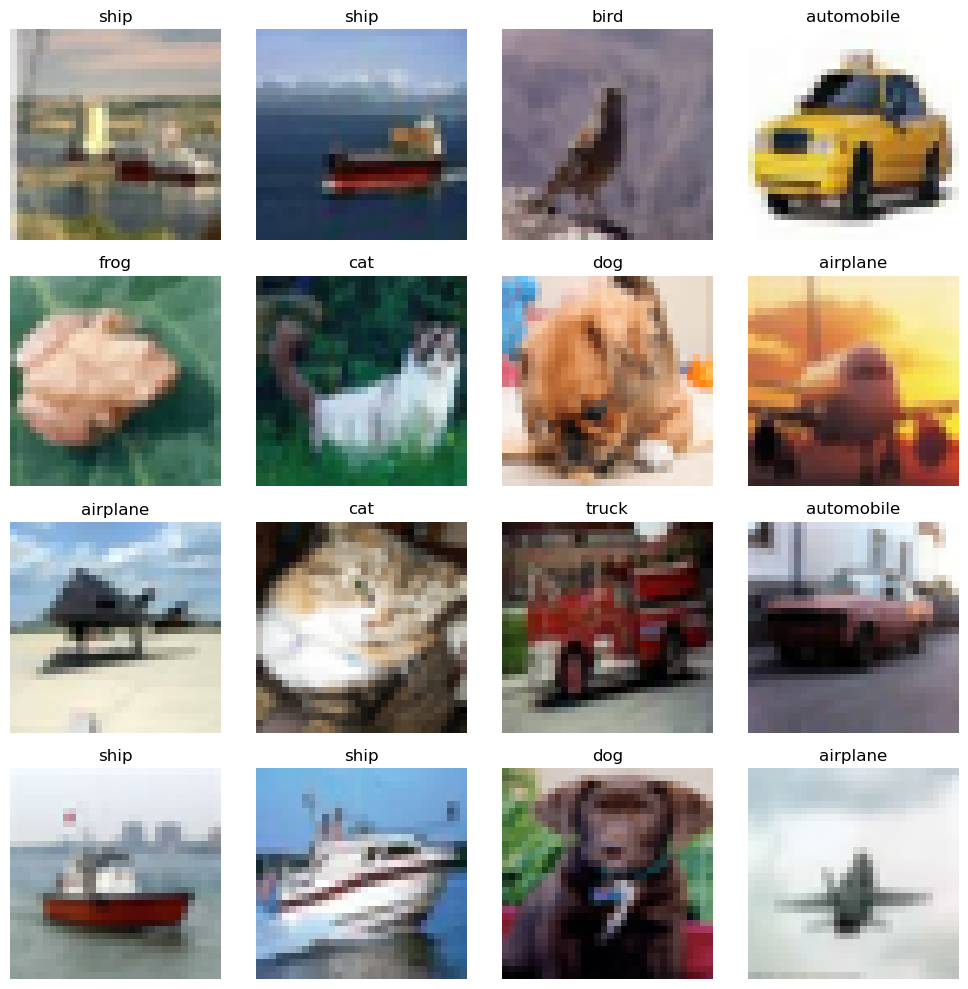

In [19]:
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_img[i])
    plt.title(class_names[int(sample_labels[i][0])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

## 10 sınıf oldugunu belirtme

## Model 

In [24]:
model = Sequential()
## 1. cnn katmanı
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3))) 
# Conv2D(32,(3,3)) -> Bu katmanda 32 adet filtre (çekirdek) kullanılacağını belirtir.Filtrelerin boyutlarını belirtir. 
# Bu durumda, her filtrenin 3x3 boyutunda olduğunu gösterir.

model.add(MaxPooling2D(2,2)) # (2, 2): Havuzlama penceresinin boyutlarını belirtir. 2x2
## 2. cnn katmanı
model.add(Conv2D(64,(3,3), activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))

model.add(Flatten()) ## tam baglantili katman
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))  ## 10 sinif bulundugu icin 10 noron cikisli katman

C:\Users\menes\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Derleme

In [27]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

### Egitim

In [ ]:
history = model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.3528 - loss: 1.7684 - val_accuracy: 0.5451 - val_loss: 1.2971
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5653 - loss: 1.2346 - val_accuracy: 0.6011 - val_loss: 1.1395
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6222 - loss: 1.0854 - val_accuracy: 0.6512 - val_loss: 1.0135
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6571 - loss: 0.9811 - val_accuracy: 0.6558 - val_loss: 1.0042
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.6820 - loss: 0.9169 - val_accuracy: 0.6644 - val_loss: 0.9808
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7030 - loss: 0.8659 - val_accuracy: 0.6808 - val_loss: 0.9234
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7204 - loss: 0.8117 - val_accuracy: 0.6800 - val_loss: 0.9203
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7328 - loss: 0.7794 - 

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)               

In [40]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 [==============================] - 2s 6ms/step - loss: 1.0867 - accuracy: 0.6961
Test Loss: 1.086684226989746
Test Accuracy: 0.6960999965667725


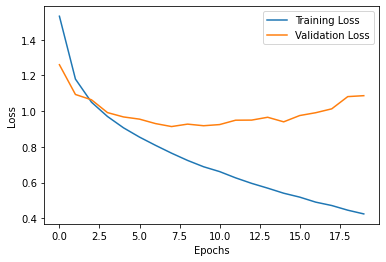

In [41]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

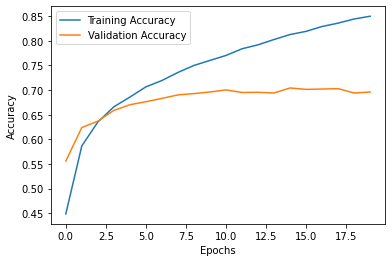

In [42]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Model 2 -> epoch 20'den 10'a düşürüldü

In [43]:
model2 = Sequential()
## 1. cnn katmanı
model2.add(Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model2.add(MaxPooling2D(2,2))
## 2. cnn katmanı
model2.add(Conv2D(64,(3,3), activation="relu",input_shape=(32,32,3)))
model2.add(MaxPooling2D(2,2))

## tam baglantili katman
model2.add(Flatten())
model2.add(Dense(64,activation="relu"))
model2.add(Dense(10,activation="softmax"))  ## 10 sinif bulundugu icin 10 noron cikisli katman

model2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

history = model2.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 21s 27ms/step - loss: 1.5315 - accuracy: 0.4522 - val_loss: 1.2597 - val_accuracy: 0.5562
Epoch 2/10
782/782 [==============================] - 30s 39ms/step - loss: 1.1736 - accuracy: 0.5895 - val_loss: 1.1166 - val_accuracy: 0.6097
Epoch 3/10
782/782 [==============================] - 26s 33ms/step - loss: 1.0501 - accuracy: 0.6352 - val_loss: 1.0607 - val_accuracy: 0.6351
Epoch 4/10
782/782 [==============================] - 26s 34ms/step - loss: 0.9642 - accuracy: 0.6662 - val_loss: 0.9766 - val_accuracy: 0.6633
Epoch 5/10
782/782 [==============================] - 26s 33ms/step - loss: 0.9050 - accuracy: 0.6858 - val_loss: 0.9625 - val_accuracy: 0.6710
Epoch 6/10
782/782 [==============================] - 26s 33ms/step - loss: 0.8570 - accuracy: 0.7042 - val_loss: 1.0162 - val_accuracy: 0.6524
Epoch 7/10
782/782 [==============================] - 26s 33ms/step - loss: 0.8143 - accuracy: 0.7189 - val_loss: 0.9295 - val_accuracy:

In [45]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [46]:
loss, accuracy = model2.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 [==============================] - 2s 6ms/step - loss: 0.9136 - accuracy: 0.6932
Test Loss: 0.9136030077934265
Test Accuracy: 0.6931999921798706


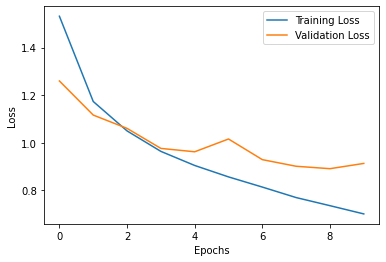

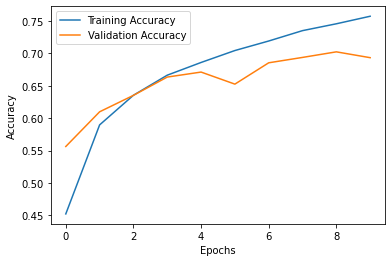

In [47]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Sonuc olarak --> (epoch sayısı 20 olan) model1 ve (epoch sayısı 10 olan) model2 arasındaki performans farkı incelendiğinde, test accuracy değerlerinin birbirine çok yakın olması, her iki modelin de test verileri üzerinde benzer performans sergilediğini gösteriyor. Ancak, epoch sayısı 10 olan modelin test loss değerinin daha düşük olması, bu modelin test verileri üzerindeki hataları daha az yaptığını gösterir.

 Model 3 -> epoch 10, 3 cnn katmanli 

In [48]:
model3 = Sequential()

## 1. cnn katmanı
model3.add(Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model3.add(MaxPooling2D(2,2))

## 2. cnn katmanı
model3.add(Conv2D(64,(3,3), activation="relu",input_shape=(32,32,3)))
model3.add(MaxPooling2D(2,2))

## 3. cnn katmanı
model3.add(Conv2D(128,(3,3), activation="relu",input_shape=(32,32,3)))
model3.add(MaxPooling2D(2,2))

## tam baglantili katman
model3.add(Flatten())
model3.add(Dense(64,activation="relu"))
model3.add(Dense(10,activation="softmax"))  ## 10 sinif bulundugu icin 10 noron cikisli katman

model3.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

history3 = model3.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 26s 33ms/step - loss: 1.6178 - accuracy: 0.4001 - val_loss: 1.2992 - val_accuracy: 0.5246
Epoch 2/10
782/782 [==============================] - 26s 33ms/step - loss: 1.2229 - accuracy: 0.5634 - val_loss: 1.1036 - val_accuracy: 0.6115
Epoch 3/10
782/782 [==============================] - 29s 37ms/step - loss: 1.0660 - accuracy: 0.6281 - val_loss: 1.0091 - val_accuracy: 0.6450
Epoch 4/10
782/782 [==============================] - 29s 37ms/step - loss: 0.9507 - accuracy: 0.6691 - val_loss: 0.9402 - val_accuracy: 0.6727
Epoch 5/10
782/782 [==============================] - 29s 36ms/step - loss: 0.8784 - accuracy: 0.6942 - val_loss: 0.9174 - val_accuracy: 0.6806
Epoch 6/10
782/782 [==============================] - 29s 37ms/step - loss: 0.8084 - accuracy: 0.7190 - val_loss: 0.8836 - val_accuracy: 0.6958
Epoch 7/10
782/782 [==============================] - 29s 37ms/step - loss: 0.7528 - accuracy: 0.7382 - val_loss: 0.8487 - val_accuracy:

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 2, 128)       

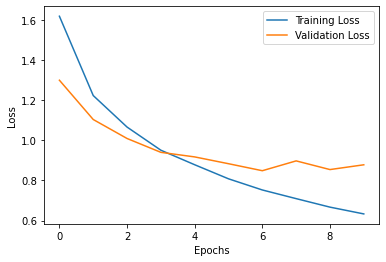

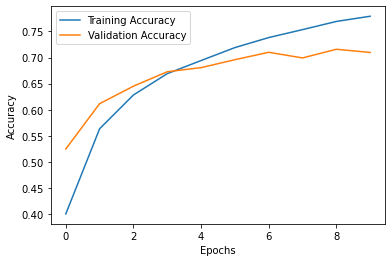

In [58]:
print(model3.summary())
print("-----------------------------------------------------------------------------")
loss, accuracy = model3.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print("\n-----------------------------------------------------------------------------")
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model 3 overfitting oldu. Bunu önlemek için birkaç yöntem kullanılabilir.
Eklenilenler : 
- model4.add(Dropout(0.5))
- early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
model4 = Sequential()

## 1. cnn katmanı
model4.add(Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model4.add(MaxPooling2D(2,2))

## 2. cnn katmanı
model4.add(Conv2D(64,(3,3), activation="relu",input_shape=(32,32,3)))
model4.add(MaxPooling2D(2,2))

## 3. cnn katmanı
model4.add(Conv2D(128,(3,3), activation="relu",input_shape=(32,32,3)))
model4.add(MaxPooling2D(2,2))

## tam baglantili katman
model4.add(Flatten())
model4.add(Dense(128,activation="relu"))
model4.add(Dropout(0.5))
model4.add(Dense(10,activation="softmax"))  ## 10 sinif bulundugu icin 10 noron cikisli katman

model4.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history4 = model4.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test, y_test),callbacks=[early_stopping])

Epoch 1/10
782/782 [==============================] - 26s 32ms/step - loss: 1.7143 - accuracy: 0.3669 - val_loss: 1.3074 - val_accuracy: 0.5245
Epoch 2/10
782/782 [==============================] - 24s 31ms/step - loss: 1.3267 - accuracy: 0.5238 - val_loss: 1.1674 - val_accuracy: 0.5774
Epoch 3/10
782/782 [==============================] - 24s 31ms/step - loss: 1.1698 - accuracy: 0.5850 - val_loss: 1.0483 - val_accuracy: 0.6332
Epoch 4/10
782/782 [==============================] - 25s 33ms/step - loss: 1.0563 - accuracy: 0.6323 - val_loss: 0.9830 - val_accuracy: 0.6503
Epoch 5/10
782/782 [==============================] - 28s 36ms/step - loss: 0.9772 - accuracy: 0.6590 - val_loss: 0.9529 - val_accuracy: 0.6687
Epoch 6/10
782/782 [==============================] - 30s 39ms/step - loss: 0.9082 - accuracy: 0.6848 - val_loss: 0.8875 - val_accuracy: 0.6900
Epoch 7/10
782/782 [==============================] - 34s 43ms/step - loss: 0.8500 - accuracy: 0.7039 - val_loss: 0.8432 - val_accuracy:

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 2, 2, 128)       

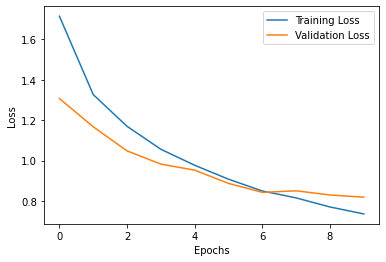

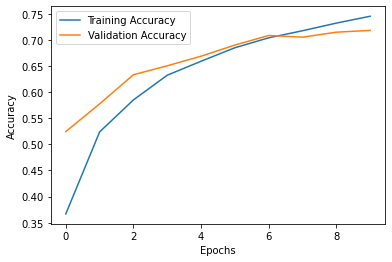

In [62]:
print(model4.summary())
print("-----------------------------------------------------------------------------")
loss, accuracy = model4.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print("\n-----------------------------------------------------------------------------")
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history4.history['accuracy'], label='Training Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Sonuç olarak model4 ile overfitting büyük ölçüde azalmış olup %71 doğruluk ile performansı artmıştır.